# Chapter 10: Python Calculus
___

## 1. Limit (极限)

### $\S$Squeeze Theorem (夹逼定理)

#### Example: 

$$\lim_{x \to 0} \frac{3\sin^2 x}{4x^2}$$

When $x \in (0,\epsilon)$, $\sin x < x < \tan x \Rightarrow 1 < \frac{x}{\sin x} < \frac{1}{\cos x} \Rightarrow \cos x < \frac{\sin x}{x} < 1$,

Since $\lim_{x \to 0} \cos x = 1$, thus
$$
\lim_{x \to 0} \frac{\sin x}{x} = 1
$$
Therefore,
$$
\lim_{x \to 0} \frac{3\sin^2 x}{4x^2} = \frac{3}{4}
$$

## 2. Function (函数)

函数能接受的所有输入的集合称为__定义域（domain）__，而所有可能输出的集合则称为__值域（range）__。

### 2.1 多项式函数
例如三次函数$$f(x) = x^3 - 3x^2 + 9$$的定义域和值域都是$\mathbb{R}$。

我们可以在Python中这样定义这个三次函数：

In [10]:
def f(x):
    return x**3 - 3*x**2 + 9

我们可以对函数绘图，这将有助于我们对函数的理解：

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

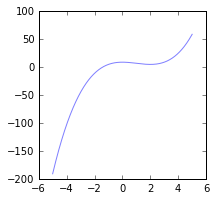

In [12]:
x = np.linspace(-5., 5., 1000)
y = f(x)
plt.figure(figsize=(3, 3))
plt.plot(x, y, 'b-', alpha=0.5)

### 2.2 指数函数（exponential function）

$$f(x) = e^x$$

指数函数的定义域为$\mathbb{R}$，而其取值域为$(0, \infty)$。从下图看，指数函数是单调递增函数。

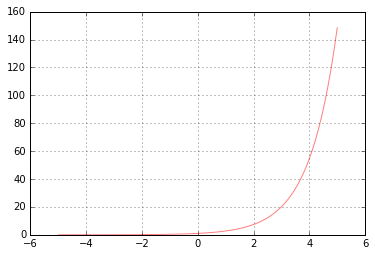

In [14]:
plt.plot(x, np.exp(x), 'r-', alpha=0.5)
plt.grid(True)

### 2.3 对数函数( logarithm function）

$$f(x) = \log x$$

对数函数的定义域为$(0,\infty)$，而其值域为$(-\infty, \infty)$。

用不同的底对其进行绘图。可以肯定的是，这些函数在定义域内都是单调递增函数。

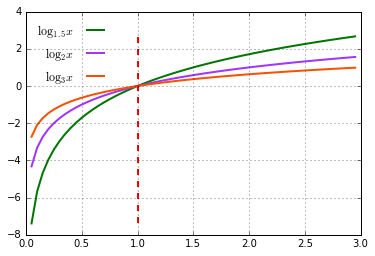

In [15]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x = np.arange(0.05, 3, 0.05)
y1 =[math.log(a, 1.5) for a in x]
plt.plot(x, y1, linewidth=2, color="#007500", label="$\log_{1.5} x$")
y2 =[math.log(a, 2) for a in x]
plt.plot(x, y2, linewidth=2, color="#9F35FF", label="$\log_2 x$")
y3 =[math.log(a, 3) for a in x]
plt.plot(x, y3, linewidth=2, color="#F75000", label="$\log_3 x$")
plt.legend(loc=0, frameon=True, fancybox=False, framealpha=0, markerfirst=False, markerscale=1)
plt.grid(True)
plt.plot([1, 1], [y1[0], y1[-1]], 'r--', linewidth=2)

### 2.4 三角函数（Trigonometric function）

三角函数的一个重要特征就是其周期性。

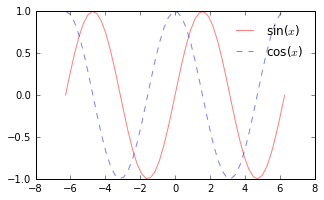

In [18]:
x = np.linspace(-2*np.pi, 2*np.pi)
plt.figure(figsize=(5,3))
plt.plot(x, np.sin(x), 'r-', alpha=.5, label='sin($x$)')
plt.plot(x, np.cos(x), 'b--', alpha=.5, label='cos($x$)')
plt.legend(loc=0, frameon=False)

## 3. 泰勒展开式（Tayor's expansion）

函数$f(x)$在$x=0$处展开的泰勒级数为：
$$f(x)=f(0)+\frac{f'(0)}{1!}x+\frac{f''(0)}{2!}x^2+\frac{f'''(0)}{3!}x^3+\dots=\sum_{k=0}^{\infty}\frac{f^{(k)}(0)}{k!}x^k$$
其中：$f^{(k)}(0)$表示函数$f$的$k$次导函数在点$x=0$处的取值。

- 当$f(x)=e^x$, 由于$f^{(k)}$，因此不难得到：
$$
\begin{align}
exp(x)=exp(0)+\frac{exp'(0)}{1!}x+\frac{exp''(0)}{2!}x^2+\frac{exp'''(0)}{3!}x^3+\dots\\
\qquad =1 + \frac{x}{1!}+\frac{x^2}{2!}+\frac{x^3}{3!}+\dots\\
\qquad =\sum_{k=0}^{\infty}\frac{x^k}{k!}
\end{align}
$$


这样，泰勒展开可以进行对复杂函数求取近似值：

0


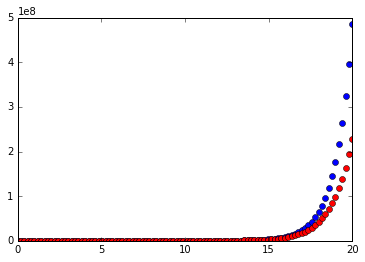

In [22]:
import sympy 
x = sympy.Symbol('x')
exp = np.exp(1)**x

# 下面开始求近似值,就取前21项的和
sums = 0
for i in range(20):
    # 求i次导函数
    numerator = exp.diff(x,i)
    # 计算导函数在x=0处的值
    numerator = numerator.evalf(subs={x:0})
    denominator = np.math.factorial(i)
    sums += numerator/denominator*x**i

# 下面检验一下原始的exp函数和其在x=0处展开的泰勒级数前20项之和的差距
print exp.evalf(subs={x:0})-sums.evalf(subs={x:0})
# result is 0
xvals = np.linspace(0,20,100)

for xval in xvals:
    plt.plot(xval,exp.evalf(subs={x:xval}),'bo',\
                xval,sums.evalf(subs={x:xval}),'ro')

## 4. 导数（Derivative）的定义

#### 定义1：
$$f'(a)=\frac{df}{dx}\bigg|_{x=a}=\lim_{x\rightarrow a}\frac{f(x)-f(a)}{x-a}$$
若该极限不存在，则函数在$x=a$处的导数不存在。

#### 定义2：
$$f'(a)=\frac{df}{dx}\bigg|_{x=a}=\lim_{h\rightarrow 0}\frac{f(a+h)-f(a)}{h}$$
若该极限不存在，则函数在$x=a$处的导函数不存在。

#### 定义3：
函数$f(x)$在$x=a$处的导数$f'(a)$是满足如下条件的常数$C$:
对于在$a$附近输入值的微小变化$h$有，$f(a+h)=f(a)+Ch+O(h^2)$始终成立。 也就是说导数$C$是输出值变化中一阶项的系数。
如果难以理解的话，对上式稍加变化，两边同时除以$h$并同时取极限可以得到：
$$\lim_{h\rightarrow 0}\frac{f(a+h)-f(a)}{h}=\lim_{h\rightarrow 0}C+O(h)=C$$
这与上面定义2相一致。

例如，求$cos(x)$在$x=a$处的导数：
$$cos(a+h)=cos(a)cos(h)-sin(a)sin(h)$$
$$\qquad = cos(a)(1+O(h^2))-sin(a)(h+O(h^3))$$
$$\qquad = cos(a)-sin(a)h +O(h^2)$$
因此，$\frac{d}{dx}{cos(x)}\bigg|_{x=a}=-sin(a)$

我们可以自行定义求导的函数：

In [38]:
f = lambda x: x**3-2*x-6

# 我们设定参数h的默认值，如果调用函数时没有指明参数h的值，便会使用默认值
def derivative(f,h=0.00001):
    return lambda x: float(f(x+h)-f(x-h))/(2*h)

fprime = derivative(f)
print fprime(6)
# result is : 105.999999995

105.999999995


### 线性近似（Linear approximation）

依据导数的定义3，我们有：
$$f(a+h)=f(a)+f'(a)h+O(h^2)$$

如果将高阶项丢掉，就获得了$f(a+h)$的线性近似式子：
$$f(a+h)\approx f(a)+f'(a)h$$

举个例子，用线性近似的方法估算$\sqrt{255}$：
$$\sqrt{256-1}\approx \sqrt{256}+\frac{1}{2\sqrt{256}}(-1)$$
$$\qquad = 16 - \frac{1}{32}$$
$$\qquad = 15\frac{31}{32}$$

## 5. 关于`sympy`

In [1]:
import sympy

sympy is another python module. Standard import to get going. Need to explicitly define symbols:

In [2]:
x, y = sympy.symbols("x, y")

Can then create new symbols and manipulate existing ones:

In [3]:
z = x**2 + x*y

### `sympy.diff`: Compute the differential in symbols

In [4]:
sympy.diff(z, x)

2*x + y

### `sympy.integrate`: Compute the integral in symbols

In [5]:
sympy.integrate(z, y)

x**2*y + x*y**2/2

In [6]:
sympy.integrate(1 + x**2*sympy.exp(x) + sympy.log(x**2+1), x)

x*log(x**2 + 1) - x + (x**2 - 2*x + 2)*exp(x) + 2*atan(x)

### `lambdify`: 

$$
\phi(x, t) = \exp(\frac{-(x-4t)^2}{4\nu(t+1)}) + \exp(\frac{-(x-4t-2\pi)^2}{4\nu(t+1)})
$$

In [8]:
from sympy.utilities.lambdify import lambdify

In [9]:
x, nu, t = sympy.symbols('x, nu, t')

phi = sympy.exp(-(x-4*t)**2/(4*nu*(t+1))) + sympy.exp(-(x-4*t-2*sympy.pi)**2/(4*nu*(t+1)))
phiprime = phi.diff(x)
dphi = lambdify((t, x, nu), phiprime)
print("Derivative at t=1, x=4, nu=3 is {}".format(dphi(1.0, 4.0, 3.0)))

Derivative at t=1, x=4, nu=3 is 0.101067805053


## 6. 牛顿法(Newton's method)

现要求我们在不使用`sqrt()`等函数的情况下计算$\sqrt{r}$，这里r是任意正实数。

我们可以用迭代法求解：

In [27]:
def mysqrt(r, x, maxiter=100, verbose=True):
    for i in xrange(maxiter):
        x = (x + float(r)/x)/2
        if verbose:
            print 'Iteration {}: sqrt(r) = {}'.format(i+1, x)
    return x

In [28]:
mysqrt(2, x=1, maxiter=5)

Iteration 1: sqrt(r) = 1.5
Iteration 2: sqrt(r) = 1.41666666667
Iteration 3: sqrt(r) = 1.41421568627
Iteration 4: sqrt(r) = 1.41421356237
Iteration 5: sqrt(r) = 1.41421356237


1.414213562373095

实际上这里就用到了牛顿法的思想。这个求二次根的问题，我们可以将其转化为求$f(x)= x^2 - r = 0$的正根，根据前面介绍的线性近似：
$$
f(x+h) \approx f(x) + f'(x)h 
$$
如果$x+h$是$f(x)=0$的一个根，则$f(x+h)=0$，换言之，也就是说
$$
0 \approx f(x) + f'(x)h \Rightarrow h \approx -\frac{f(x)}{f'(x)}
$$

因此，如果我们给出一个初始的估计值，就可以通过不停的迭代获取更优的根了：
$$
x^{(k+1)} = x^{(k)} - \frac{f(x)}{f'(x)}
$$

将$f(x)=x^2-r$带入上式，我们就不难得到：
$$
x^{(k+1)} = (x^{(k)} + r/x^{(k)})/2
$$

我们将这种思想写成更加广泛的情况，应用`sympy`的代数求导算子：

In [41]:
def Newton(f, start=1, maxiter=100, verbose=False):
    s = start
    for i in range(maxiter):
        s = s - f.subs(x, s) / f.diff().subs(x,s)
        if verbose:
            print "Iteration {0}: the root updated to {1}".format(i+1, s)
            
    return s

In [42]:
from sympy.abc import x
f = x**2 - 2*x - 4

print Newton(f, start=2, maxiter=10, verbose=True)

Iteration 1: the root updated to 4
Iteration 2: the root updated to 10/3
Iteration 3: the root updated to 68/21
Iteration 4: the root updated to 3194/987
Iteration 5: the root updated to 7049156/2178309
Iteration 6: the root updated to 34335360355130/10610209857723
Iteration 7: the root updated to 814611591808161107664147908/251728825683549488150424261
Iteration 8: the root updated to 458530826114150735385486704359180155664128766445180474/141693817714056513234709965875411919657707794958199867
Iteration 9: the root updated to 145279535205231319666831538153486883351061511307068141306369093080126941153612715385906055722955473453067716/44893845313309942978077298160660626646181883623886239791269694466661322268805744081870933775586567858979269
Iteration 10: the root updated to 14583986368754825474086391296793959117442335896684617275432411637174800297824373159748818737508709697989663632500623786821296209584881578950680942754733704841052055950281374062393266955211436589046471653706784277050/45